In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
#from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.metrics import confusion_matrix 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
#from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier



applications = pd.read_csv("C:/BI/CIND 820/Files/application_record.csv", encoding = 'utf-8') 
credit_record = pd.read_csv("C:/BI/CIND 820/Files/credit_record.csv", encoding = 'utf-8') 

applications.head()


C:\Users\sarah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [2]:
applications.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
applications.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [5]:
credit_record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [6]:
credit_record.describe()

,ID,MONTHS_BALANCE
count,1.048575e+06,1.048575e+06
mean,5.068286e+06,-1.913700e+01
std,4.615058e+04,1.402350e+01
min,5.001711e+06,-6.000000e+01
25%,5.023644e+06,-2.900000e+01
50%,5.062104e+06,-1.700000e+01
75%,5.113856e+06,-7.000000e+00
max,5.150487e+06,0.000000e+00


In [7]:
applications.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [8]:
applications.FLAG_MOBIL.value_counts()

1    438557
Name: FLAG_MOBIL, dtype: int64

In [9]:
credit_record.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [11]:
credit_record.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [2]:
#Convert status values to binary (2,3,4,5 --> 1 'Bad'; Else 0 'Good')

credit_record['STATUS'] = np.where((credit_record['STATUS'] == '2') | 
                                   (credit_record['STATUS'] == '3' )| 
                                   (credit_record['STATUS'] == '4' )| 
                                   (credit_record['STATUS'] == '5'), 1, 0)

In [3]:
credit_record.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
5,5001712,-1,0
6,5001712,-2,0
7,5001712,-3,0
8,5001712,-4,0
9,5001712,-5,0


In [6]:

credit_record.STATUS.value_counts()

0    1045471
1       3104
Name: STATUS, dtype: int64

In [5]:
applications.FLAG_MOBIL.value_counts()

1    438557
Name: FLAG_MOBIL, dtype: int64

In [7]:
#Drop unwanted data
applications.drop( columns = ['FLAG_MOBIL'],inplace=True)
applications.dropna(subset=['OCCUPATION_TYPE'],inplace=True)
applications.drop_duplicates(subset=applications.columns[1:],inplace=True)

In [9]:
applications.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62608 entries, 2 to 438553
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   62608 non-null  int64  
 1   CODE_GENDER          62608 non-null  object 
 2   FLAG_OWN_CAR         62608 non-null  object 
 3   FLAG_OWN_REALTY      62608 non-null  object 
 4   CNT_CHILDREN         62608 non-null  int64  
 5   AMT_INCOME_TOTAL     62608 non-null  float64
 6   NAME_INCOME_TYPE     62608 non-null  object 
 7   NAME_EDUCATION_TYPE  62608 non-null  object 
 8   NAME_FAMILY_STATUS   62608 non-null  object 
 9   NAME_HOUSING_TYPE    62608 non-null  object 
 10  DAYS_BIRTH           62608 non-null  int64  
 11  DAYS_EMPLOYED        62608 non-null  int64  
 12  FLAG_WORK_PHONE      62608 non-null  int64  
 13  FLAG_PHONE           62608 non-null  int64  
 14  FLAG_EMAIL           62608 non-null  int64  
 15  OCCUPATION_TYPE      62608 non-null

In [93]:
#Optional

merged_data2 = pd.merge(applications, credit_record, how = "inner" , on='ID')


In [94]:
#Optional

merged_data2['Age']= -(merged_data2['DAYS_BIRTH'])//365
merged_data2['Years_of_employment']= -(merged_data2['DAYS_EMPLOYED'])//365
merged_data2.drop( columns = ['DAYS_BIRTH'],inplace=True)
merged_data2.drop( columns = ['DAYS_EMPLOYED'],inplace=True)
merged_data2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,Age,Years_of_employment
0,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,0,0,58,3
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,-1,0,58,3
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,-2,0,58,3
3,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,-3,0,58,3
4,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,0,0,0,Security staff,2.0,-4,0,58,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151214,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,-9,0,25,3
151215,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,-10,1,25,3
151216,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,-11,0,25,3
151217,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,0,0,0,Laborers,1.0,-12,0,25,3


<AxesSubplot:>

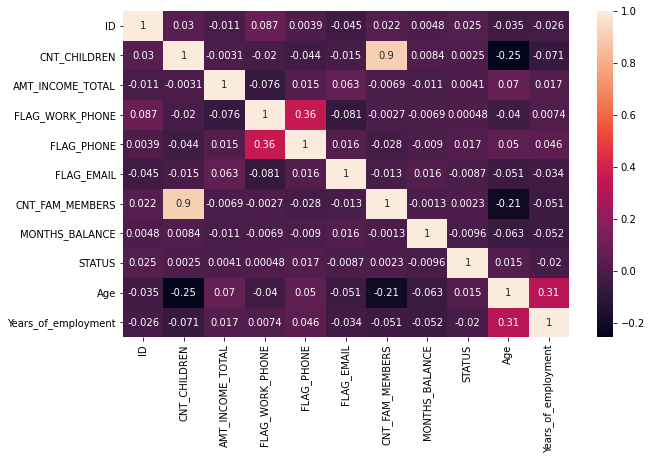

In [95]:
#Optional

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(merged_data2.corr(), ax=ax, annot=True)

<AxesSubplot:>

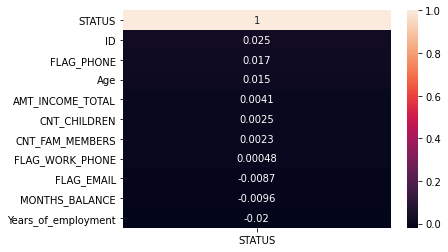

In [96]:
#Optional


corr = merged_data2.corr()[['STATUS']].sort_values(by='STATUS', ascending=False)

sns.heatmap(corr, annot=True)

In [12]:
#creating a DF with the most recent month in each status for all applications

credit_classified = pd.DataFrame(pd.unique(credit_record.ID),columns = ['ID'])

In [13]:
#creating a DF with the most recent month in each status for all applications
credit_classified['Max_Mnth_Good'] = [max(credit_record[(credit_record.ID == i) & (credit_record.STATUS == 0)].MONTHS_BALANCE) for i in credit_classified.ID]
credit_classified['Max_Mnth_Bad'] = [max(credit_record[(credit_record.ID == i) & (credit_record.STATUS == 1)].MONTHS_BALANCE ,default=1) for i in credit_classified.ID]


In [14]:
#creating a DF with the most recent month in each status for all applications

credit_classified['Status'] = ["Good" if (credit_classified.Max_Mnth_Good.iloc[i] > credit_classified.Max_Mnth_Bad.iloc[i]) or (credit_classified.Max_Mnth_Bad.iloc[i] == 1) else "Bad" for i in range(len(credit_classified.ID))]

In [15]:
credit_classified.Status.value_counts()

Good    45873
Bad       112
Name: Status, dtype: int64

In [16]:
credit_classified.head()

,ID,Max_Mnth_Good,Max_Mnth_Bad,Status
0,5001711,0,1,Good
1,5001712,0,1,Good
2,5001713,0,1,Good
3,5001714,0,1,Good
4,5001715,0,1,Good


In [17]:
credit_classified

,ID,Max_Mnth_Good,Max_Mnth_Bad,Status
0,5001711,0,1,Good
1,5001712,0,1,Good
2,5001713,0,1,Good
3,5001714,0,1,Good
4,5001715,0,1,Good
...,...,...,...,...
45980,5150482,-11,1,Good
45981,5150483,0,1,Good
45982,5150484,0,1,Good
45983,5150485,0,1,Good


In [18]:
credit_classified[credit_classified["Status"]=="Bad"]

,ID,Max_Mnth_Good,Max_Mnth_Bad,Status
2450,5004891,-1,0,Bad
2695,5005205,-3,0,Bad
3795,5009524,-2,0,Bad
3970,5009744,-15,0,Bad
3974,5009749,-11,0,Bad
...,...,...,...,...
45103,5149188,-30,-19,Bad
45105,5149190,-10,0,Bad
45107,5149192,-54,-43,Bad
45621,5149828,-3,0,Bad


In [11]:
#Merging all data

In [19]:
merged_data = pd.merge(applications, credit_classified, how = "inner" , on='ID')

In [20]:
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6715 entries, 0 to 6714
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6715 non-null   int64  
 1   CODE_GENDER          6715 non-null   object 
 2   FLAG_OWN_CAR         6715 non-null   object 
 3   FLAG_OWN_REALTY      6715 non-null   object 
 4   CNT_CHILDREN         6715 non-null   int64  
 5   AMT_INCOME_TOTAL     6715 non-null   float64
 6   NAME_INCOME_TYPE     6715 non-null   object 
 7   NAME_EDUCATION_TYPE  6715 non-null   object 
 8   NAME_FAMILY_STATUS   6715 non-null   object 
 9   NAME_HOUSING_TYPE    6715 non-null   object 
 10  DAYS_BIRTH           6715 non-null   int64  
 11  DAYS_EMPLOYED        6715 non-null   int64  
 12  FLAG_WORK_PHONE      6715 non-null   int64  
 13  FLAG_PHONE           6715 non-null   int64  
 14  FLAG_EMAIL           6715 non-null   int64  
 15  OCCUPATION_TYPE      6715 non-null   o

In [21]:
merged_data.describe()


,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Max_Mnth_Good,Max_Mnth_Bad
count,6.715000e+03,6715.000000,6.715000e+03,6715.000000,6715.000000,6715.000000,6715.000000,6715.000000,6715.000000,6715.000000,6715.000000
mean,5.076510e+06,0.508116,1.896064e+05,-14769.037081,-2485.386299,0.266567,0.286969,0.097096,2.282353,-5.743708,0.593745
std,4.091949e+04,0.819438,1.022247e+05,3529.228015,2299.573276,0.442197,0.452381,0.296111,0.976996,11.381815,3.611201
min,5.008806e+06,0.000000,2.700000e+04,-24611.000000,-15713.000000,0.000000,0.000000,0.000000,1.000000,-59.000000,-50.000000
25%,5.036962e+06,0.000000,1.260000e+05,-17448.000000,-3350.500000,0.000000,0.000000,0.000000,2.000000,-6.000000,1.000000
50%,5.078898e+06,0.000000,1.665000e+05,-14548.000000,-1788.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000
75%,5.113032e+06,1.000000,2.250000e+05,-11919.500000,-859.000000,1.000000,1.000000,0.000000,3.000000,0.000000,1.000000
max,5.150467e+06,19.000000,1.575000e+06,-7489.000000,-17.000000,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [22]:
#Handling Outliers
#the function to define the whiskers 
def drop_outlier(x):
    q75,q25 = np.percentile(merged_data[x],[75,25])
    intr_qr = q75-q25
    mx = q75+(1.5*intr_qr)
    mn = q25-(1.5*intr_qr)
    return mx,mn

In [106]:
#pip install seaborn==0.11.0

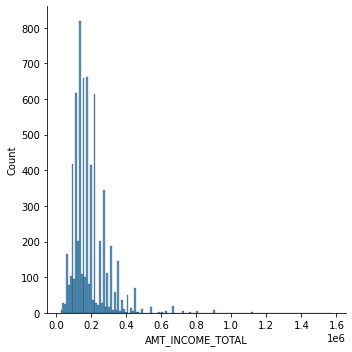

In [23]:
sns.displot(merged_data, x="AMT_INCOME_TOTAL")

<AxesSubplot:>

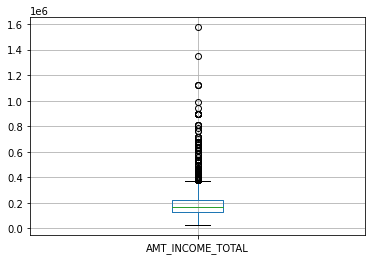

In [24]:
merged_data.boxplot('AMT_INCOME_TOTAL')

In [25]:
mx,mn = drop_outlier('AMT_INCOME_TOTAL')
mx,mn

(373500.0, -22500.0)

In [26]:
merged_data.drop(merged_data[merged_data.AMT_INCOME_TOTAL > mx].index,inplace=True)
#merged_data.shape[0]
len(merged_data.index)


6433

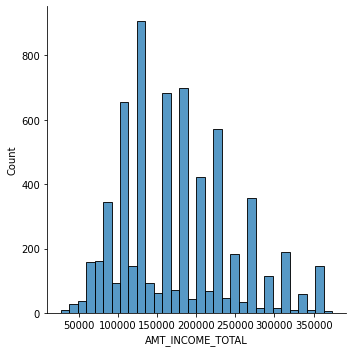

In [27]:
sns.displot(merged_data, x="AMT_INCOME_TOTAL")

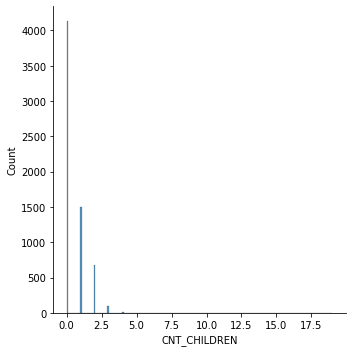

In [28]:
sns.displot(merged_data, x="CNT_CHILDREN")

<AxesSubplot:>

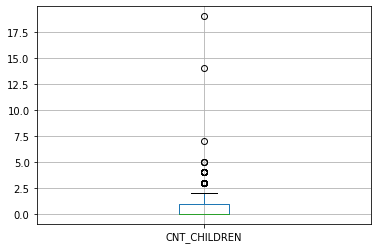

In [30]:
merged_data.boxplot('CNT_CHILDREN')

In [31]:
mx,mn = drop_outlier('CNT_CHILDREN')
mx,mn

(2.5, -1.5)

In [32]:
merged_data.drop(merged_data[merged_data.CNT_CHILDREN > 3].index,inplace=True)
len(merged_data.index)


6414

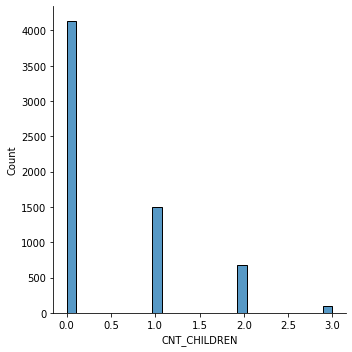

In [35]:
#"Customer Distribution by number of children
sns.displot(merged_data, x="CNT_CHILDREN")


<AxesSubplot:>

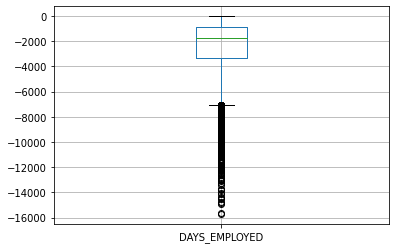

In [36]:
merged_data.boxplot('DAYS_EMPLOYED')

In [37]:
mx,mn = drop_outlier('DAYS_EMPLOYED')
mx,mn

(2863.125, -7043.875)

In [38]:
merged_data.drop(merged_data[merged_data.DAYS_EMPLOYED > mx].index,inplace=True)
merged_data.drop(merged_data[merged_data.DAYS_EMPLOYED < mn].index,inplace=True)
len(merged_data.index)

6050

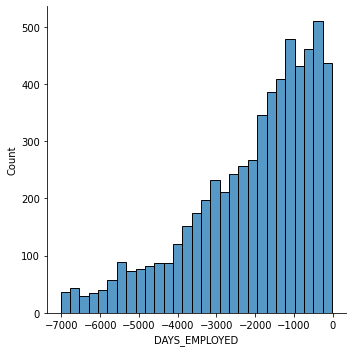

In [39]:
sns.displot(merged_data, x="DAYS_EMPLOYED")

<AxesSubplot:>

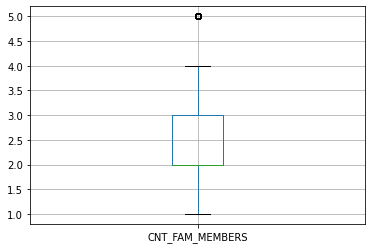

In [40]:
merged_data.boxplot('CNT_FAM_MEMBERS')


In [41]:
mx,mn = drop_outlier('CNT_FAM_MEMBERS')
mx,mn

(4.5, 0.5)

In [42]:
merged_data.drop(merged_data[merged_data.CNT_FAM_MEMBERS > 6].index,inplace=True)
len(merged_data.index)

6050

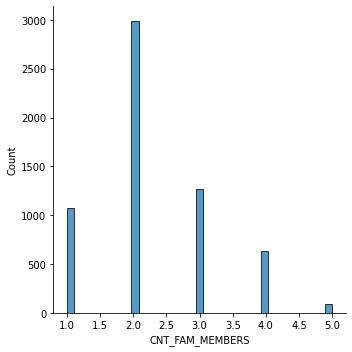

In [133]:
#"Customer Distribution by family members

sns.displot(merged_data, x="CNT_FAM_MEMBERS")

In [43]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6050 entries, 0 to 6714
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   6050 non-null   int64  
 1   CODE_GENDER          6050 non-null   object 
 2   FLAG_OWN_CAR         6050 non-null   object 
 3   FLAG_OWN_REALTY      6050 non-null   object 
 4   CNT_CHILDREN         6050 non-null   int64  
 5   AMT_INCOME_TOTAL     6050 non-null   float64
 6   NAME_INCOME_TYPE     6050 non-null   object 
 7   NAME_EDUCATION_TYPE  6050 non-null   object 
 8   NAME_FAMILY_STATUS   6050 non-null   object 
 9   NAME_HOUSING_TYPE    6050 non-null   object 
 10  DAYS_BIRTH           6050 non-null   int64  
 11  DAYS_EMPLOYED        6050 non-null   int64  
 12  FLAG_WORK_PHONE      6050 non-null   int64  
 13  FLAG_PHONE           6050 non-null   int64  
 14  FLAG_EMAIL           6050 non-null   int64  
 15  OCCUPATION_TYPE      6050 non-null   o

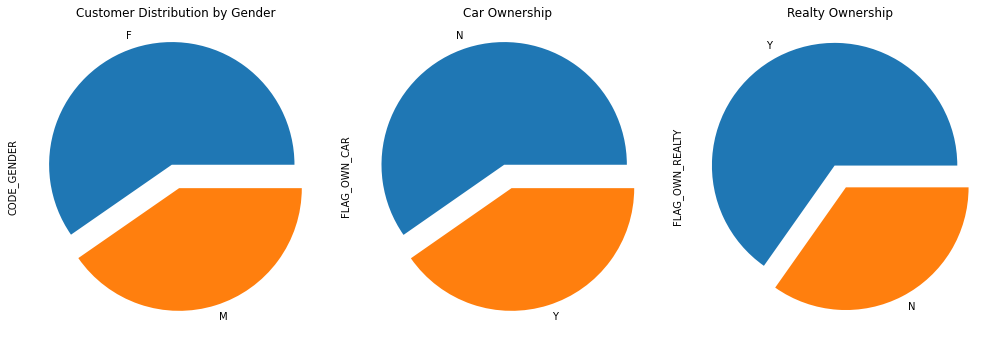

In [44]:
fig, axes = plt.subplots(1,3)

g1= merged_data['CODE_GENDER'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[0])
g1.set_title("Customer Distribution by Gender")

g2= merged_data['FLAG_OWN_CAR'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[1])
g2.set_title("Car Ownership")

g3= merged_data['FLAG_OWN_REALTY'].value_counts().plot.pie(explode=[0.1,0.1], ax=axes[2])
g3.set_title("Realty Ownership")

fig.set_size_inches(14,5)

plt.tight_layout()

plt.show()

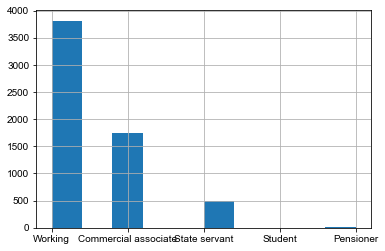

In [45]:
#Customer Distribution by Income Type

merged_data['NAME_INCOME_TYPE'].hist()
sns.set(rc={'figure.figsize':(15,3)})

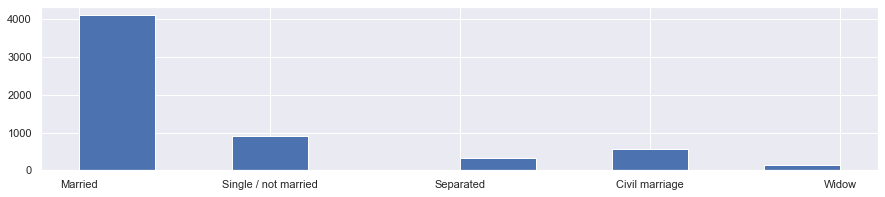

In [137]:
#Customer Distribution by family status
merged_data['NAME_FAMILY_STATUS'].hist()
sns.set(rc={'figure.figsize':(15,3)})

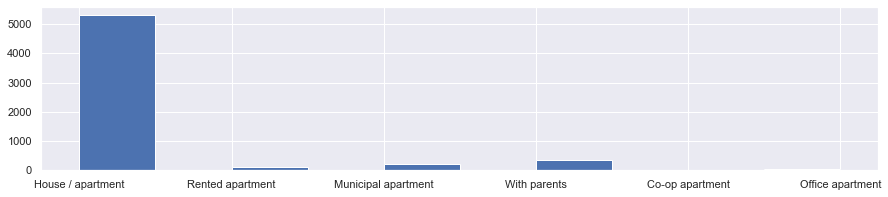

In [138]:
#Customer Distribution by Housing type
merged_data['NAME_HOUSING_TYPE'].hist()
sns.set(rc={'figure.figsize':(15,3)})

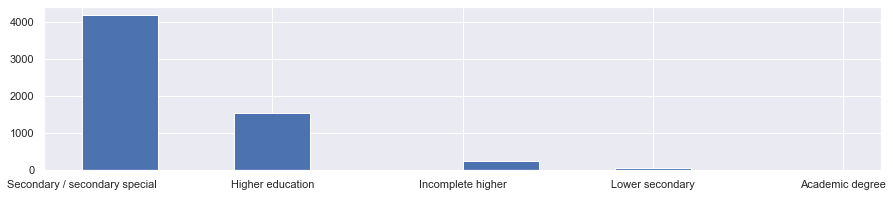

In [46]:
#Customer Distribution by Education Type
merged_data['NAME_EDUCATION_TYPE'].hist()
sns.set(rc={'figure.figsize':(15,3)})

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

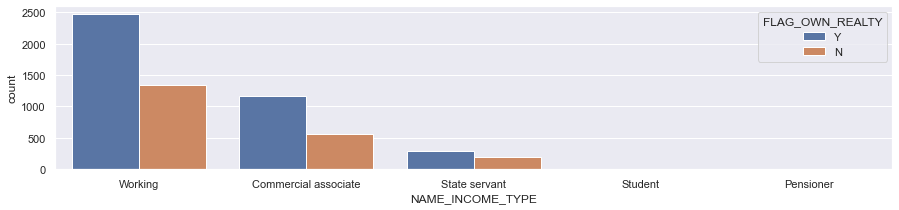

In [139]:
#Income type Distribution in realty ownership
from pylab import rcParams
sns.set(rc={'figure.figsize':(15,3)})
sns.countplot(x='NAME_INCOME_TYPE',hue='FLAG_OWN_REALTY',data=merged_data)

Text(0.5, 1.0, 'NAME_INCOME_TYPE')

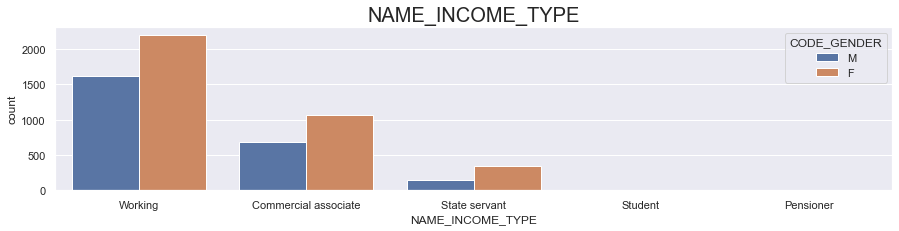

In [140]:
#Income type Distribution in gender
sns.set(rc={'figure.figsize':(15,3)})
S=sns.countplot(x='NAME_INCOME_TYPE',hue='CODE_GENDER',data=merged_data)
S.axes.set_title("NAME_INCOME_TYPE",fontsize=20)

Text(0.5, 1.0, 'OCCUPATION_TYPE')

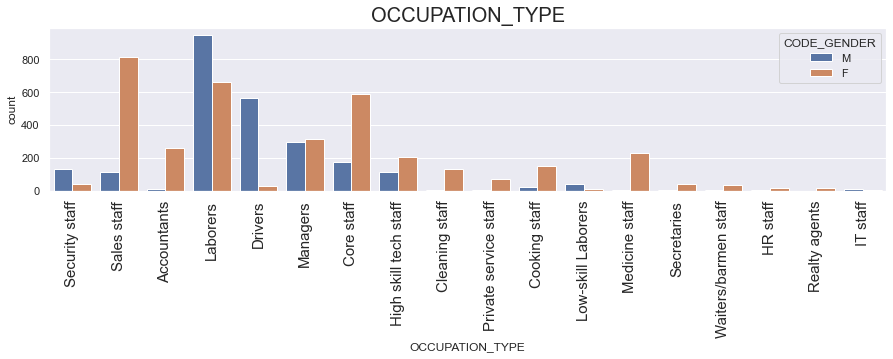

In [141]:
sns.set(rc={'figure.figsize':(15,3)})
plt.xticks(fontsize=15,rotation='vertical')
P=sns.countplot(x='OCCUPATION_TYPE',hue='CODE_GENDER',data=merged_data)
P.axes.set_title("OCCUPATION_TYPE",fontsize=20)

In [145]:
#customer distribution by age
sns.set(rc={'figure.figsize':(10,3)})
merged_data['Age']= -(merged_data['DAYS_BIRTH'])//365
merged_data['Age']= merged_data['Age'].astype(int)
#print(merged_data['Age'].value_counts(bins=10,normalize=True,sort=False))
#merged_data['Age'].plot(kind='hist',bins=20,density=True)
#plt.show()


<AxesSubplot:>

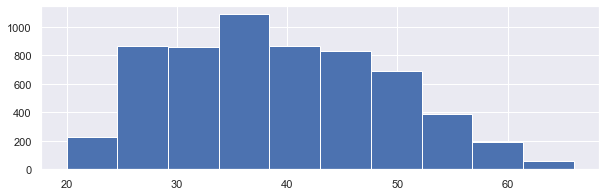

In [146]:
merged_data['Age'].hist()

<AxesSubplot:>

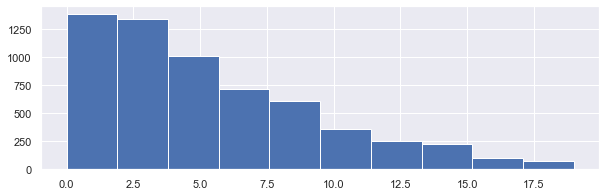

In [147]:
#customer distribution by years of employment

sns.set(rc={'figure.figsize':(10,3)})
merged_data['Years_of_employment']= -(merged_data['DAYS_EMPLOYED'])//365
#merged_data['Years_of_employment']= merged_data['Years_of_employment'].astype(int)
#print(merged_data['Age'].value_counts(bins=10,normalize=True,sort=False))
#merged_data['Years_of_employment'].plot(kind='hist',bins=20,density=True)
#plt.show()
merged_data['Years_of_employment'].hist()

<AxesSubplot:>

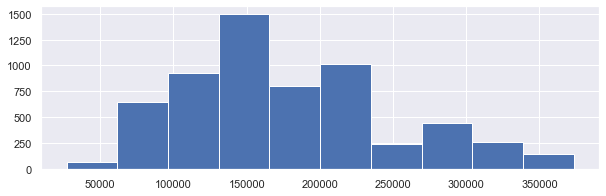

In [148]:
sns.set(rc={'figure.figsize':(10,3)})
merged_data['AMT_INCOME_TOTAL']=merged_data['AMT_INCOME_TOTAL'].astype(object)
#merged_data['AMT_INCOME_TOTAL'] = merged_data['AMT_INCOME_TOTAL']/10000
#print(merged_data['AMT_INCOME_TOTAL'].value_counts(bins=10,sort=False))
#merged_data['AMT_INCOME_TOTAL'].plot(kind='hist',bins=60,density=True)
#plt.show()

merged_data['AMT_INCOME_TOTAL'].hist()

<AxesSubplot:ylabel='ID'>

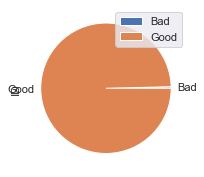

In [149]:
#optional

merged_data.groupby(['Status']).count().plot(kind='pie', y='ID')

<AxesSubplot:>

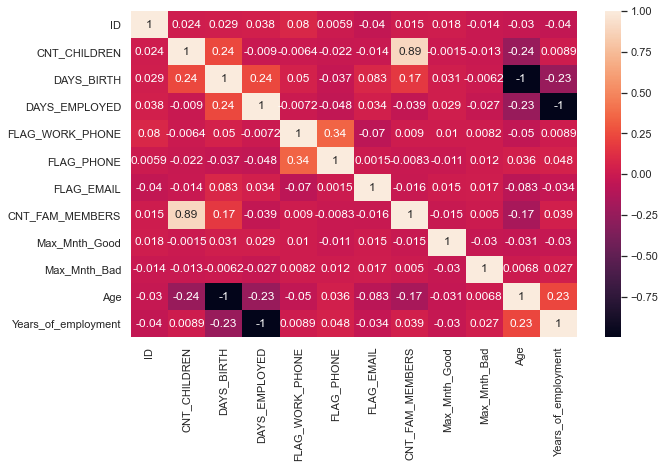

In [150]:
#import seaborn as sns
#import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(merged_data.corr(), ax=ax, annot=True)


<AxesSubplot:>

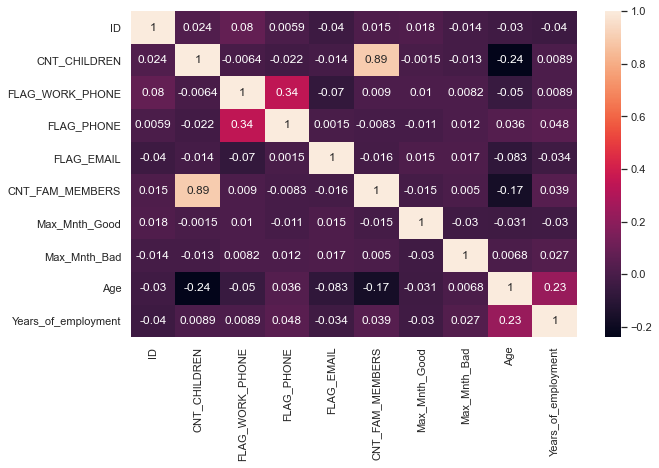

In [153]:
merged_data.drop( columns = ['DAYS_BIRTH'],inplace=True)
merged_data.drop( columns = ['DAYS_EMPLOYED'],inplace=True)

fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(merged_data.corr(), ax=ax, annot=True)


<AxesSubplot:>

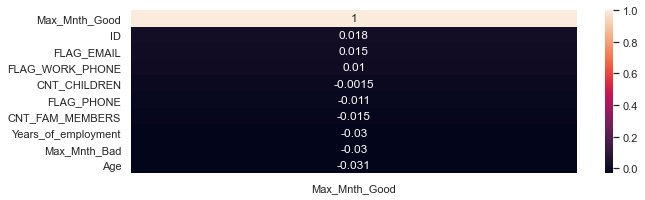

In [154]:
#optional

corr = merged_data.corr()[['Max_Mnth_Good']].sort_values(by='Max_Mnth_Good', ascending=False)

sns.heatmap(corr, annot=True)

<AxesSubplot:>

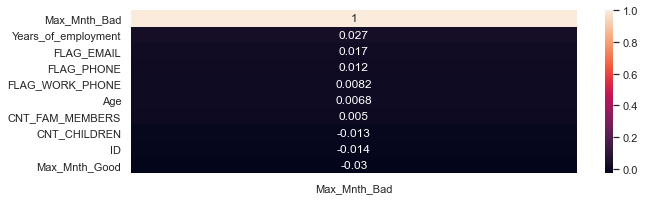

In [155]:
#optional

corr = merged_data.corr()[['Max_Mnth_Bad']].sort_values(by='Max_Mnth_Bad', ascending=False)

sns.heatmap(corr, annot=True)